### Problem Statement
## Perform sentimental analysis: 
### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

## Web-scraping
- Scraped Amazon product reviews data for some Oneplus Flagship Smartphone.
- Introduction to using Splash and Docker for web-scraping
- Step-by-step implementation of popular web-scraping Python libraries: BeautifulSoup, requests, and Splash.

In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

### A. Looping through multiple pages
One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.

Try for yourself! See how the URL changes as you go through multiple pages.

For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

#### We can even add in a a stop condition. For this one, we can tell Python to look for a greyed out “Next Page” button. To identify this element, use the element inspector.

Add this to the bottom of the function above.

In [6]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)

    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\DELL\AppData\Local\Temp\ipykernel_1524\965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [36]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

Rating                                              Title  \
0        4.0                          One Plus Nord Ce2 Lite 5g   
1        4.0  NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...   
2        4.0                            Best for elderly people   
3        4.0                                           Good one   
4        4.0                              After 6 months of use   
...      ...                                                ...   
4995     5.0            Really nice mobile in this price range.   
4996     5.0                                           Super ❤️   
4997     4.0                                             Gaming   
4998     4.0                                      Bettry batter   
4999     4.0                                               nice   

                                                 Review  \
0     A Midrange phone from oneplus. why I choose th...   
1     I was searching a smartphone in 25-30k segment...   
2     Bought in big billion day sale but towards the...   
3     *Battery life is decent, if you're a heavy use...   
4     After the six months of use i would like to sa...   
...                                                 ...   
4995  Must buy phone in this price range. I got mobi...   
4996                                              Super   
4997  Like charging but dislike 4500 only batteryMin...   
4998                                              pH pH   
4999                                                yes   

                                   Review_Date  
0     Reviewed in India 🇮🇳 on 2 September 2022  
1      Reviewed in India 🇮🇳 on 7 November 2022  
2      Reviewed in India 🇮🇳 on 8 November 2022  
3      Reviewed in India 🇮🇳 on 2 November 2022  
4      Reviewed in India 🇮🇳 on 4 November 2022  
...                                        ...  
4995                               7 June 2022  
4996                              22 July 2022  
4997                             19 March 2022  
4998                              3 April 2022  
4999                              6 April 2022  

[5000 rows x 4 columns]

In [11]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

## Import Libraries

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already u

In [69]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0','Review_Date'],inplace=True,axis=1)
reviews

Rating                                              Title  \
0          4                          One Plus Nord Ce2 Lite 5g   
1          4  NICE PHONE WITH NICE FEATURES BUT BATTERY & BR...   
2          4                            Best for elderly people   
3          4                                           Good one   
4          4                              After 6 months of use   
...      ...                                                ...   
4995       5            Really nice mobile in this price range.   
4996       5                                           Super ❤️   
4997       4                                             Gaming   
4998       4                                      Bettry batter   
4999       4                                               nice   

                                                 Review  
0     A Midrange phone from oneplus. why I choose th...  
1     I was searching a smartphone in 25-30k segment...  
2     Bought in big billion day sale but towards the...  
3     *Battery life is decent, if you're a heavy use...  
4     After the six months of use i would like to sa...  
...                                                 ...  
4995  Must buy phone in this price range. I got mobi...  
4996                                              Super  
4997  Like charging but dislike 4500 only batteryMin...  
4998                                              pH pH  
4999                                                yes  

[5000 rows x 3 columns]

## <a id='3'>3. Data Exploration</a>

In [70]:
reviews.Rating.describe()

count    5000.000000
mean        4.278400
std         0.765644
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

#### Number of Words

In [71]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

Review  word_count
0  A Midrange phone from oneplus. why I choose th...         133
1  I was searching a smartphone in 25-30k segment...         131
2  Bought in big billion day sale but towards the...         123
3  *Battery life is decent, if you're a heavy use...         111
4  After the six months of use i would like to sa...         100

#### Number of characters

In [72]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

Review  char_count
0  A Midrange phone from oneplus. why I choose th...       707.0
1  I was searching a smartphone in 25-30k segment...       678.0
2  Bought in big billion day sale but towards the...       706.0
3  *Battery life is decent, if you're a heavy use...       617.0
4  After the six months of use i would like to sa...       491.0

#### Average Word Length

In [73]:
def avg_word(sentence):
    words = str(sentence).split()
    return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

Review  avg_word
0  A Midrange phone from oneplus. why I choose th...  4.323308
1  I was searching a smartphone in 25-30k segment...  4.183206
2  Bought in big billion day sale but towards the...  4.747967
3  *Battery life is decent, if you're a heavy use...  4.567568
4  After the six months of use i would like to sa...  3.920000

#### Number of stopwords

In [74]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

Review  stopwords
0  A Midrange phone from oneplus. why I choose th...         57
1  I was searching a smartphone in 25-30k segment...         64
2  Bought in big billion day sale but towards the...         46
3  *Battery life is decent, if you're a heavy use...         52
4  After the six months of use i would like to sa...         43

#### Number of special characters

In [75]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

Review  hashtags
0  A Midrange phone from oneplus. why I choose th...         0
1  I was searching a smartphone in 25-30k segment...         0
2  Bought in big billion day sale but towards the...         0
3  *Battery life is decent, if you're a heavy use...         0
4  After the six months of use i would like to sa...         0

#### Number of numerics

In [76]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

Review  numerics
0  A Midrange phone from oneplus. why I choose th...         1
1  I was searching a smartphone in 25-30k segment...         2
2  Bought in big billion day sale but towards the...         1
3  *Battery life is decent, if you're a heavy use...         1
4  After the six months of use i would like to sa...         1

#### Number of Uppercase words

In [77]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

Review  upper
0  A Midrange phone from oneplus. why I choose th...      6
1  I was searching a smartphone in 25-30k segment...      4
2  Bought in big billion day sale but towards the...      2
3  *Battery life is decent, if you're a heavy use...      1
4  After the six months of use i would like to sa...      0

In [78]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','hashtags','upper'],axis=1,inplace=True)

####  Spelling correction
We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words.

To achieve this we will use the textblob library. If you are not familiar with it, you can check my previous article on ‘NLP for beginners using textblob’

In [79]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    A Midrange phone from onerous. why I choose th...
1    I was searching a smartphone in 25-ask segment...
2    Ought in big billion day sale but towards the ...
3    *Battery life is decent, if you're a heavy use...
4    After the six months of use i would like to sa...
Name: Review, dtype: object

#### As you can see spelling mistake did a mistake of correcting the word Hang into Sang in Context to this review the word 'Hang' fits here and not 'Sang'

In [80]:
# Data Visualization

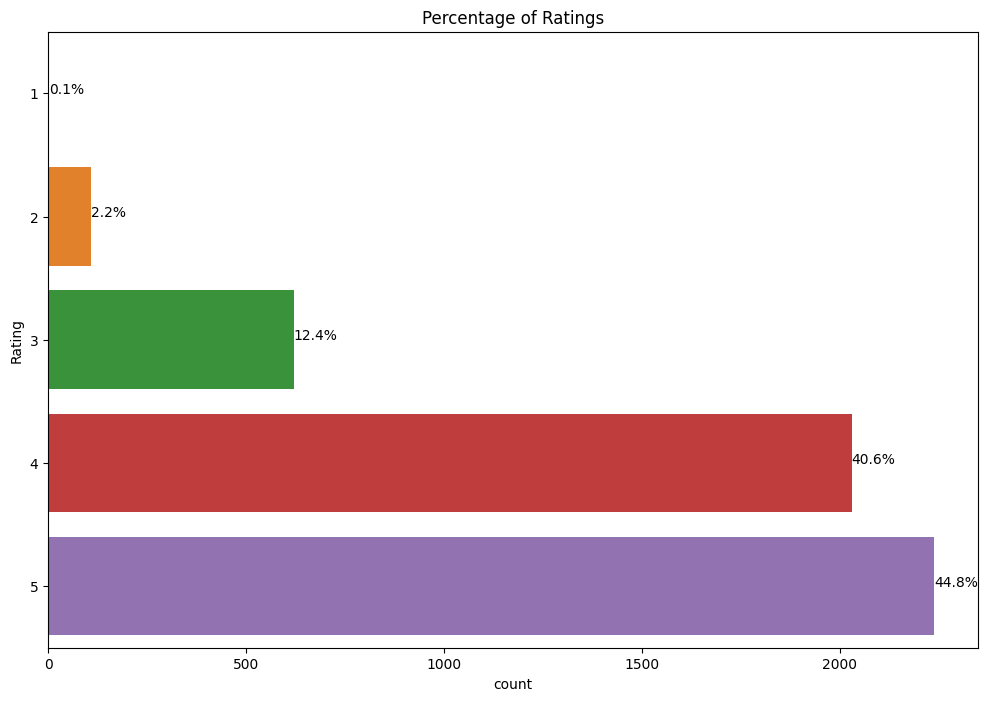

In [82]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

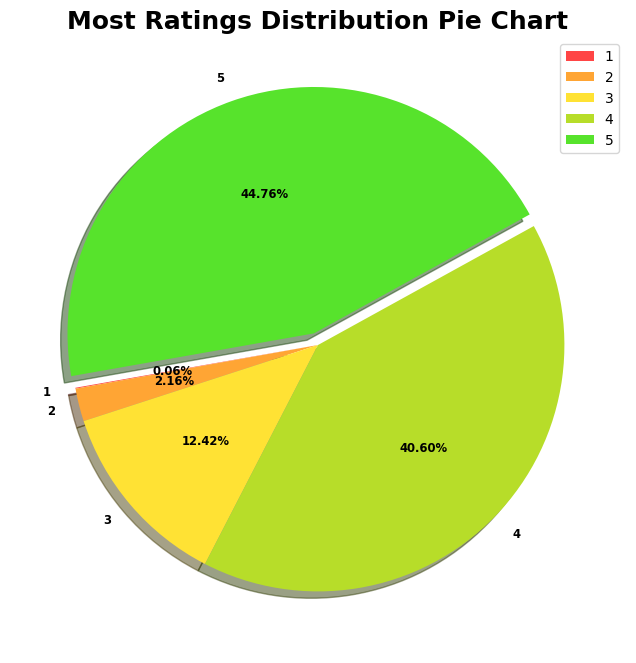

In [84]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'color':'black'})
plt.legend(loc= 'best')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# BasicText Preprocessing
### A. For Sentiment Analysis 
##### keeping the DataFrame intact and each tweets separate from each other

In [85]:
data = df[['Review']]
data

Review
0     A Midrange phone from oneplus. why I choose th...
1     I was searching a smartphone in 25-30k segment...
2     Bought in big billion day sale but towards the...
3     *Battery life is decent, if you're a heavy use...
4     After the six months of use i would like to sa...
...                                                 ...
4995  Must buy phone in this price range. I got mobi...
4996                                              Super
4997  Like charging but dislike 4500 only batteryMin...
4998                                              pH pH
4999                                                yes

[5000 rows x 1 columns]

In [86]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [87]:
data

Review
0     a midrange phone oneplus. i choose phone brand...
1     i searching smartphone 25-30k segment checked ...
2     bought big billion day sale towards end. my ex...
3     *battery life decent, heavy user get backup 12...
4     after six months use would like say good phone...
...                                                 ...
4995  must buy phone price range. i got mobile 18500...
4996                                              super
4997     like charging dislike 4500 batteryminimum 5000
4998                                              ph ph
4999                                                yes

[5000 rows x 1 columns]

In [88]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [89]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   

                                   Uncleaned_Reviews  
0  A Midrange phone from oneplus. why I choose th...  
1  I was searching a smartphone in 25-30k segment...  
2  Bought in big billion day sale but towards the...  
3  *Battery life is decent, if you're a heavy use...  
4  After the six months of use i would like to sa...

# Text Pre-processing Techniques 
### A. Pre-processing 'Key Words'
#### a. Removing '@names'

In [90]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [91]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   
5  one established brand paying premium price mob...   
6  first thing first phone easily beat redmi phon...   
7  u game addict phone uhh game like bgmi nd batt...   
8  bought phone dad wanted chuck away redmi note ...   
9  overall satisfied product quality performance ...   

                                   Uncleaned_Reviews  
0  A Midrange phone from oneplus. why I choose th...  
1  I was searching a smartphone in 25-30k segment...  
2  Bought in big billion day sale but towards the...  
3  *Battery life is decent, if you're a heavy use...  
4  After the six months of use i would like to sa...  
5  One+ has established itself as a brand so payi...  
6  First things first, this is the phone who very...  
7  If u are not a game addict then this phone is ...  
8  Bought this phone for my Dad who wanted to chu...  
9  Overall satisfied with the product quality and...

#### b. Removing links (http | https)

In [92]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   
5  one established brand paying premium price mob...   
6  first thing first phone easily beat redmi phon...   
7  u game addict phone uhh game like bgmi nd batt...   
8  bought phone dad wanted chuck away redmi note ...   
9  overall satisfied product quality performance ...   

                                   Uncleaned_Reviews  
0  A Midrange phone from oneplus. why I choose th...  
1  I was searching a smartphone in 25-30k segment...  
2  Bought in big billion day sale but towards the...  
3  *Battery life is decent, if you're a heavy use...  
4  After the six months of use i would like to sa...  
5  One+ has established itself as a brand so payi...  
6  First things first, this is the phone who very...  
7  If u are not a game addict then this phone is ...  
8  Bought this phone for my Dad who wanted to chu...  
9  Overall satisfied with the product quality and...

#### c. Removing Review with empty text

In [93]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   
5  one established brand paying premium price mob...   
6  first thing first phone easily beat redmi phon...   
7  u game addict phone uhh game like bgmi nd batt...   
8  bought phone dad wanted chuck away redmi note ...   
9  overall satisfied product quality performance ...   

                                   Uncleaned_Reviews  
0  A Midrange phone from oneplus. why I choose th...  
1  I was searching a smartphone in 25-30k segment...  
2  Bought in big billion day sale but towards the...  
3  *Battery life is decent, if you're a heavy use...  
4  After the six months of use i would like to sa...  
5  One+ has established itself as a brand so payi...  
6  First things first, this is the phone who very...  
7  If u are not a game addict then this phone is ...  
8  Bought this phone for my Dad who wanted to chu...  
9  Overall satisfied with the product quality and...

#### d. Dropping duplicate rows

In [94]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   
5  one established brand paying premium price mob...   
6  first thing first phone easily beat redmi phon...   
7  u game addict phone uhh game like bgmi nd batt...   
8  bought phone dad wanted chuck away redmi note ...   
9  overall satisfied product quality performance ...   

                                   Uncleaned_Reviews  
0  A Midrange phone from oneplus. why I choose th...  
1  I was searching a smartphone in 25-30k segment...  
2  Bought in big billion day sale but towards the...  
3  *Battery life is decent, if you're a heavy use...  
4  After the six months of use i would like to sa...  
5  One+ has established itself as a brand so payi...  
6  First things first, this is the phone who very...  
7  If u are not a game addict then this phone is ...  
8  Bought this phone for my Dad who wanted to chu...  
9  Overall satisfied with the product quality and...

#### e. Resetting index

In [96]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   
5  one established brand paying premium price mob...   
6  first thing first phone easily beat redmi phon...   
7  u game addict phone uhh game like bgmi nd batt...   
8  bought phone dad wanted chuck away redmi note ...   
9  overall satisfied product quality performance ...   

                                   Uncleaned_Reviews  
0  A Midrange phone from oneplus. why I choose th...  
1  I was searching a smartphone in 25-30k segment...  
2  Bought in big billion day sale but towards the...  
3  *Battery life is decent, if you're a heavy use...  
4  After the six months of use i would like to sa...  
5  One+ has established itself as a brand so payi...  
6  First things first, this is the phone who very...  
7  If u are not a game addict then this phone is ...  
8  Bought this phone for my Dad who wanted to chu...  
9  Overall satisfied with the product quality and...

#### f. Removing Punctuations, Numbers and Special characters


In [97]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [98]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   
5  one established brand paying premium price mob...   
6  first thing first phone easily beat redmi phon...   
7  u game addict phone uhh game like bgmi nd batt...   
8  bought phone dad wanted chuck away redmi note ...   
9  overall satisfied product quality performance ...   

                                   Uncleaned_Reviews  
0  A Midrange phone from oneplus. why I choose th...  
1  I was searching a smartphone in 25-30k segment...  
2  Bought in big billion day sale but towards the...  
3  *Battery life is decent, if you're a heavy use...  
4  After the six months of use i would like to sa...  
5  One+ has established itself as a brand so payi...  
6  First things first, this is the phone who very...  
7  If u are not a game addict then this phone is ...  
8  Bought this phone for my Dad who wanted to chu...  
9  Overall satisfied with the product quality and...

#### g. Function to remove emoji

In [99]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [100]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   
5  one established brand paying premium price mob...   
6  first thing first phone easily beat redmi phon...   
7  u game addict phone uhh game like bgmi nd batt...   
8  bought phone dad wanted chuck away redmi note ...   
9  overall satisfied product quality performance ...   

                                   Uncleaned_Reviews  
0  A Midrange phone from oneplus. why I choose th...  
1  I was searching a smartphone in 25-30k segment...  
2  Bought in big billion day sale but towards the...  
3  *Battery life is decent, if you're a heavy use...  
4  After the six months of use i would like to sa...  
5  One+ has established itself as a brand so payi...  
6  First things first, this is the phone who very...  
7  If u are not a game addict then this phone is ...  
8  Bought this phone for my Dad who wanted to chu...  
9  Overall satisfied with the product quality and...

In [101]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   
5  one established brand paying premium price mob...   
6  first thing first phone easily beat redmi phon...   
7  u game addict phone uhh game like bgmi nd batt...   
8  bought phone dad wanted chuck away redmi note ...   
9  overall satisfied product quality performance ...   

                                   Uncleaned_Reviews  \
0  A Midrange phone from oneplus. why I choose th...   
1  I was searching a smartphone in 25-30k segment...   
2  Bought in big billion day sale but towards the...   
3  *Battery life is decent, if you're a heavy use...   
4  After the six months of use i would like to sa...   
5  One+ has established itself as a brand so payi...   
6  First things first, this is the phone who very...   
7  If u are not a game addict then this phone is ...   
8  Bought this phone for my Dad who wanted to chu...   
9  Overall satisfied with the product quality and...   

                                    tokenized_tweets  
0  [midrange, phone, oneplus, choose, phone, bran...  
1  [searching, smartphone, k, segment, checked, l...  
2  [bought, big, billion, day, sale, towards, end...  
3  [battery, life, decent, heavy, user, get, back...  
4  [six, month, use, would, like, say, good, phon...  
5  [one, established, brand, paying, premium, pri...  
6  [first, thing, first, phone, easily, beat, red...  
7  [u, game, addict, phone, uhh, game, like, bgmi...  
8  [bought, phone, dad, wanted, chuck, away, redm...  
9  [overall, satisfied, product, quality, perform...

In [102]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

#### h. Removing Stop words

In [103]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [104]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [105]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   
5  one established brand paying premium price mob...   
6  first thing first phone easily beat redmi phon...   
7  u game addict phone uhh game like bgmi nd batt...   
8  bought phone dad wanted chuck away redmi note ...   
9  overall satisfied product quality performance ...   

                                   Uncleaned_Reviews  
0  A Midrange phone from oneplus. why I choose th...  
1  I was searching a smartphone in 25-30k segment...  
2  Bought in big billion day sale but towards the...  
3  *Battery life is decent, if you're a heavy use...  
4  After the six months of use i would like to sa...  
5  One+ has established itself as a brand so payi...  
6  First things first, this is the phone who very...  
7  If u are not a game addict then this phone is ...  
8  Bought this phone for my Dad who wanted to chu...  
9  Overall satisfied with the product quality and...

#### i. Tokenize 'Clean_Reviews'  

In [106]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['searching', 'smartphone', 'k', 'segment', 'checked', 'lot', 'phone', 'could', 'find', 'good', 'phone', 'screen', 'fps', 'dedicated', 'sim', 'mc', 'slot', 'suddenly', 'checked', 'google', 'also', 'launching', 'phone', 'feature', 'watched', 'unboxing', 'video', 'decided', 'buy', 'phone', 'brightness', 'display', 'battery', 'good', 'definitely', 'awesome', 'per', 'performance', 'brand', 'phone', 'good', 'including', 'card', 'discount', 'antutu', 'lac', 'antutu', 'iphone', 'r', 'k', 'cost', 'lac', 'deal', 'bad', 'planing', 'buy', 'check', 'phone', 'showroom', 'ytube'])

In [107]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [midrange, phone, oneplus, choose, phone, bran...
1    [searching, smartphone, k, segment, checked, l...
2    [bought, big, billion, day, sale, towards, end...
3    [battery, life, decent, heavy, user, get, back...
4    [six, month, use, would, like, say, good, phon...
5    [one, established, brand, paying, premium, pri...
6    [first, thing, first, phone, easily, beat, red...
7    [u, game, addict, phone, uhh, game, like, bgmi...
8    [bought, phone, dad, wanted, chuck, away, redm...
9    [overall, satisfied, product, quality, perform...
Name: Clean_Reviews, dtype: object

#### j. Converting words to Stemmer

In [108]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [109]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

stemmed
0     midrang phone oneplus choos phone brand valu o...
1     search smartphon k segment check lot phone cou...
2     bought big billion day sale toward end experi ...
3     batteri life decent heavi user get backup hr c...
4     six month use would like say good phone price ...
...                                                 ...
4941  must buy phone price rang got mobil r camera q...
4942                                              super
4943                   like charg dislik batteryminimum
4944                                              ph ph
4945                                                yes

[4946 rows x 1 columns]

#### k. Converting words to Lemma

In [110]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


stemmed
0     midrange phone oneplus choose phone brand valu...
1     searching smartphone k segment checked lot pho...
2     bought big billion day sale towards end experi...
3     battery life decent heavy user get backup hr c...
4     six month use would like say good phone price ...
...                                                 ...
4941  must buy phone price range got mobile r camera...
4942                                              super
4943               like charging dislike batteryminimum
4944                                              ph ph
4945                                                yes

[4946 rows x 1 columns]

##  Basic Feature Extaction
### A. **Applying bag of Words without N grams**

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [113]:
print(cv.vocabulary_)

{'midrange': 2460, 'phone': 2924, 'oneplus': 2735, 'choose': 734, 'brand': 513, 'value': 4230, 'option': 2779, 'like': 2265, 'vivo': 4273, 'realme': 3245, 'pro': 3083, 'oppo': 2764, 'motorola': 2546, 'premium': 3056, 'feel': 1437, 'reason': 3248, 'given': 1632, 'four': 1529, 'star': 3793, 'amoled': 145, 'display': 1126, 'important': 1939, 'wide': 4363, 'angle': 160, 'lens': 2229, 'also': 124, 'removed': 3334, 'alert': 108, 'slider': 3661, 'otherwise': 2805, 'perfect': 2891, 'satisfied': 3470, 'device': 1069, 'definitely': 1011, 'go': 1649, 'thing': 4005, 'red': 3284, 'cable': 584, 'available': 263, 'signature': 3631, 'mobile': 2501, 'oxygen': 2835, 'give': 1631, 'extremely': 1374, 'performance': 2897, 'fill': 1461, 'makhan': 2368, 'malai': 2370, 'thank': 3978, 'searching': 3516, 'smartphone': 3690, 'segment': 3532, 'checked': 716, 'lot': 2326, 'could': 913, 'find': 1466, 'good': 1655, 'screen': 3503, 'fps': 1532, 'dedicated': 999, 'sim': 3635, 'mc': 2418, 'slot': 3674, 'suddenly': 3860

In [114]:
print(cv.get_feature_names()[109:200])

['alexa', 'alignment', 'alike', 'allover', 'allow', 'allram', 'allready', 'allright', 'allround', 'allrounder', 'almost', 'alone', 'along', 'already', 'alril', 'also', 'alsothe', 'alspath', 'alternative', 'although', 'altogether', 'always', 'amaze', 'amazed', 'amazing', 'amazingly', 'amazon', 'amazone', 'amazonit', 'amazoooon', 'ambient', 'amd', 'amezing', 'amezon', 'amloiedover', 'amo', 'amoled', 'amolid', 'among', 'amount', 'ample', 'amzon', 'anazing', 'andar', 'andbcamera', 'andfinger', 'andif', 'andorid', 'android', 'androidbattery', 'angel', 'angle', 'angry', 'animation', 'announce', 'announces', 'annoying', 'another', 'answer', 'answering', 'antutu', 'anybody', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'anywehe', 'anywhere', 'aod', 'apart', 'aperture', 'apex', 'app', 'apparent', 'apparently', 'appear', 'appearance', 'appeared', 'appearing', 'appears', 'apperance', 'apple', 'application', 'appliction', 'applied', 'applies', 'applying', 'appointed', 'appointm

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [115]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aahenic', 'aap', 'aapko', 'aati', 'aayega', 'ab', 'abhi', 'able', 'abnd', 'abnormal', 'absence', 'absolutely', 'absolutelybut', 'absurd', 'abt', 'acalso', 'accept', 'acceptable', 'acceptablecamera', 'accepted', 'accepts', 'access', 'accessible', 'accessing', 'accessory', 'accha', 'accidental', 'accommodated', 'accomodate', 'accomplished', 'according', 'accordingbrand', 'account', 'accurate', 'acha', 'achcha', 'achchha', 'achchhi', 'achha', 'achhi', 'achi', 'achieved', 'act', 'activate', 'activated', 'activates', 'active', 'activity', 'actual', 'actually', 'ad', 'adapter', 'adaption', 'adaptive', 'adaptor', 'add', 'added', 'addict', 'addicted', 'adding', 'addition', 'additional', 'address', 'adjust', 'adjusted', 'adjustment', 'admirable', 'admit', 'adopted', 'adopter', 'adoptor', 'advance', 'advanced', 'advantage', 'adventurous', 'advertised', 'advice', 'aesthetic', 'aesthetically', 'affect', 'afford', 'affordable', 'aftar', 'afterall', 'afterwards', 'agai', 'againovera

In [116]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [117]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4946 [00:00<?, ?it/s]

In [118]:
corpus[4]

'six month use would like say good phone price rang within month use face problem like sometim mani app like paytm phonep etc get crash open contact abl save well cannot make call sometim app also get crash notic oneplu care also clueless hope soon give updat abl fix major problem want hard reset'

In [119]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [120]:
X.shape

(4946, 5000)

In [121]:
cv.get_feature_names()[:20]

['aacha',
 'aap',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'account',
 'accur',
 'acha',
 'acha hai',
 'achcha',
 'achha',
 'achi',
 'activ',
 'actual',
 'ad']

In [122]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [123]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

aacha  aap  abl  absolut  accept  access  accessori  accha  accord  \
0         0    0    0        0       0       0          0      0       0   
1         0    0    0        0       0       0          0      0       0   
2         0    0    0        0       0       0          0      0       0   
3         0    0    1        0       0       0          0      0       0   
4         0    0    2        0       0       0          0      0       0   
...     ...  ...  ...      ...     ...     ...        ...    ...     ...   
4941      0    0    0        0       0       0          0      0       0   
4942      0    0    0        0       0       0          0      0       0   
4943      0    0    0        0       0       0          0      0       0   
4944      0    0    0        0       0       0          0      0       0   
4945      0    0    0        0       0       0          0      0       0   

      accord price  ...  year old  year secur  year secur updat  yellow  \
0                0  ...         0           0                 0       0   
1                0  ...         0           0                 0       0   
2                0  ...         0           0                 0       0   
3                0  ...         0           0                 0       0   
4                0  ...         0           0                 0       0   
...            ...  ...       ...         ...               ...     ...   
4941             0  ...         0           0                 0       0   
4942             0  ...         0           0                 0       0   
4943             0  ...         0           0                 0       0   
4944             0  ...         0           0                 0       0   
4945             0  ...         0           0                 0       0   

      yesterday  yet  youtub  yr  zero  zoom  
0             0    0       0   0     0     0  
1             0    0       0   0     0     0  
2             0    0       0   0     0     0  
3             0    0       0   0     0     0  
4             0    0       0   0     0     0  
...         ...  ...     ...  ..   ...   ...  
4941          0    0       0   0     0     0  
4942          0    0       0   0     0     0  
4943          0    0       0   0     0     0  
4944          0    0       0   0     0     0  
4945          0    0       0   0     0     0  

[4946 rows x 5000 columns]

### C. TF-IDF Vectorizer

In [124]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4946 [00:00<?, ?it/s]

In [125]:
corpus[4]

'six month use would like say good phone price rang within month use face problem like sometim mani app like paytm phonep etc get crash open contact abl save well cannot make call sometim app also get crash notic oneplu care also clueless hope soon give updat abl fix major problem want hard reset'

In [126]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [127]:
X.shape

(4946, 5000)

In [128]:
tfidf_v.get_feature_names()[:20]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aacha',
 'aap',
 'abl',
 'absolut',
 'accept',
 'access',
 'accessori',
 'accha',
 'accord',
 'accord price',
 'account',
 'accur',
 'acha',
 'acha hai',
 'achcha',
 'achha',
 'achi',
 'activ',
 'actual',
 'ad']

In [129]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [130]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

aacha  aap       abl  absolut  accept  access  accessori  accha  accord  \
0       0.0  0.0  0.000000      0.0     0.0     0.0        0.0    0.0     0.0   
1       0.0  0.0  0.000000      0.0     0.0     0.0        0.0    0.0     0.0   
2       0.0  0.0  0.000000      0.0     0.0     0.0        0.0    0.0     0.0   
3       0.0  0.0  0.107240      0.0     0.0     0.0        0.0    0.0     0.0   
4       0.0  0.0  0.231634      0.0     0.0     0.0        0.0    0.0     0.0   
...     ...  ...       ...      ...     ...     ...        ...    ...     ...   
4941    0.0  0.0  0.000000      0.0     0.0     0.0        0.0    0.0     0.0   
4942    0.0  0.0  0.000000      0.0     0.0     0.0        0.0    0.0     0.0   
4943    0.0  0.0  0.000000      0.0     0.0     0.0        0.0    0.0     0.0   
4944    0.0  0.0  0.000000      0.0     0.0     0.0        0.0    0.0     0.0   
4945    0.0  0.0  0.000000      0.0     0.0     0.0        0.0    0.0     0.0   

      accord price  ...  year old  year secur  year secur updat  yellow  \
0              0.0  ...       0.0         0.0               0.0     0.0   
1              0.0  ...       0.0         0.0               0.0     0.0   
2              0.0  ...       0.0         0.0               0.0     0.0   
3              0.0  ...       0.0         0.0               0.0     0.0   
4              0.0  ...       0.0         0.0               0.0     0.0   
...            ...  ...       ...         ...               ...     ...   
4941           0.0  ...       0.0         0.0               0.0     0.0   
4942           0.0  ...       0.0         0.0               0.0     0.0   
4943           0.0  ...       0.0         0.0               0.0     0.0   
4944           0.0  ...       0.0         0.0               0.0     0.0   
4945           0.0  ...       0.0         0.0               0.0     0.0   

      yesterday  yet  youtub   yr  zero  zoom  
0           0.0  0.0     0.0  0.0   0.0   0.0  
1           0.0  0.0     0.0  0.0   0.0   0.0  
2           0.0  0.0     0.0  0.0   0.0   0.0  
3           0.0  0.0     0.0  0.0   0.0   0.0  
4           0.0  0.0     0.0  0.0   0.0   0.0  
...         ...  ...     ...  ...   ...   ...  
4941        0.0  0.0     0.0  0.0   0.0   0.0  
4942        0.0  0.0     0.0  0.0   0.0   0.0  
4943        0.0  0.0     0.0  0.0   0.0   0.0  
4944        0.0  0.0     0.0  0.0   0.0   0.0  
4945        0.0  0.0     0.0  0.0   0.0   0.0  

[4946 rows x 5000 columns]

### D. Named Entity Recognition (NER)

In [131]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'midrange phone oneplus choose phone brand value option like vivo realme pro oppo motorola oneplus premium feel reason given four star amoled display important wide angle lens also removed alert slider otherwise phone perfect satisfied device definitely go important thing red cable available signature oneplus mobile also oxygen perfect like give extremely performance fill like makhan malai thank searching smartphone k segment checked lot phone could find good phone screen fps dedicated sim mc slot suddenly checked google also launching phone feature watched unboxing video decided buy phone brightness display battery good definitely awesome per performance brand phone good including card discount antutu lac antutu iphone r k cost lac deal bad planing buy check phone showroom ytube bought big billion day sale towards end experience amazon take time delivering product worth push bad product line starting immediate delivery gifted mother year elderly person phone perfect initially confused

In [132]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [133]:
for token in doc_block[:50]:
    print(token,token.pos_)  

midrange ADJ
phone NOUN
oneplus NOUN
choose VERB
phone NOUN
brand NOUN
value NOUN
option NOUN
like ADP
vivo PROPN
realme PROPN
pro PROPN
oppo VERB
motorola PROPN
oneplus PROPN
premium NOUN
feel VERB
reason NOUN
given VERB
four NUM
star NOUN
amoled VERB
display NOUN
important ADJ
wide ADJ
angle NOUN
lens NOUN
also ADV
removed VERB
alert ADJ
slider NOUN
otherwise ADV
phone NOUN
perfect ADJ
satisfied ADJ
device NOUN
definitely ADV
go VERB
important ADJ
thing NOUN
red ADJ
cable NOUN
available ADJ
signature NOUN
oneplus NOUN
mobile NOUN
also ADV
oxygen NOUN
perfect ADJ
like INTJ


In [134]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['felt', 'power', 'hand', 'battery', 'camera', 'feature', 'recommend', 'phone', 'youngster', 'want', 'budget', 'power', 'filled', 'smartphone', 'battery', 'life', 'user', 'get', 'hr', 'charge', 'user', 'getting', 'hr', 'camera', 'night', 'mode', 'working', 'light', 'get', 'satisfaction', 'issue', 'phone', 'brightness', 'keeping', 'brightness', 'level', 'see', 'thing', 'night', 'keep', 'brightness', 'affect', 'battery', 'backup', 'faced', 'issue', 'brightness', 'rest', 'working', 'month', 'use', 'say', 'phone', 'price', 'range', 'month', 'use', 'facing', 'problem', 'apps', 'phonepe', 'crashed', 'opened', 'contact', 'make', 'call', 'crashing', 'noticed', 'oneplus', 'care', 'hope', 'give', 'update', 'fix', 'problem', 'want', 'reset', 'established', 'brand', 'paying', 'premium', 'price', 'mobilecamera', 'quality', 'night', 'motion', 'easilybattery', 'good', 'last', 'day', 'easilybody', 'looking', 'ruggedos', 'operation', 'thing', 'phone', 'beat', 'phone', 'camera', 'price']


In [135]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0        phone   2019
1       camera   1434
2      battery    985
3      quality    870
4      product    466
5        price    425
6         life    337
7     charging    312
8  performance    311
9          day    305

<AxesSubplot: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

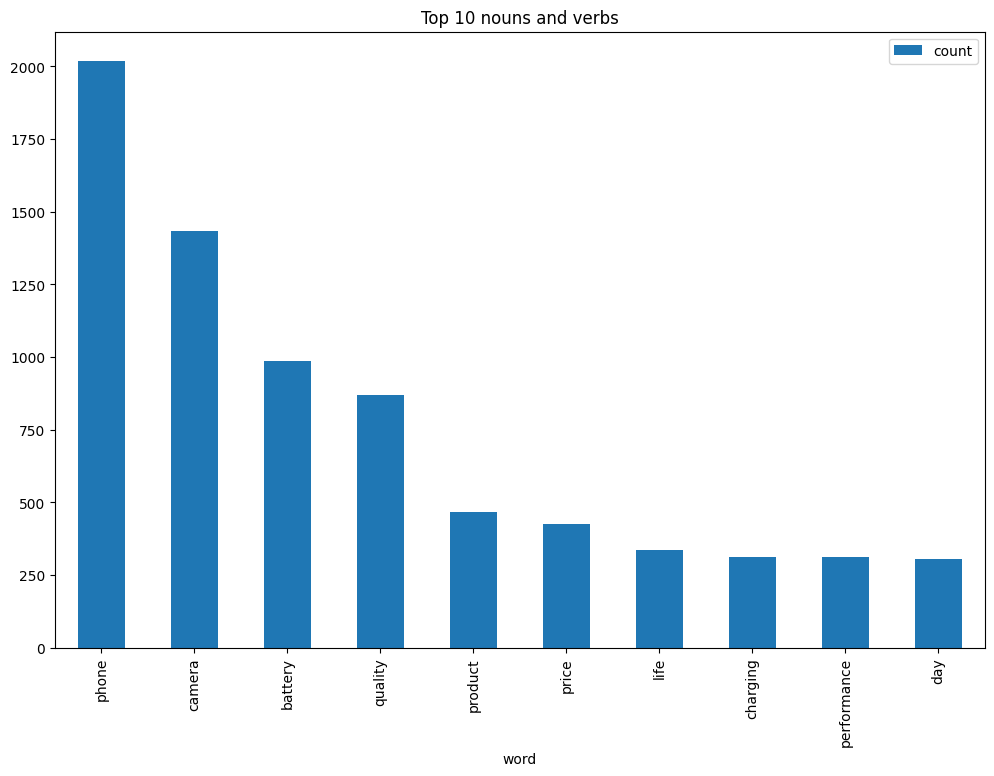

In [136]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

## Feature Extraction

We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

1. __Bag of words (Simple vectorization)__
2. __TF-IDF (Term Frequency - Inverse Document Frequency)__

We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.


### A. Feature Extraction for 'Key Words'

In [137]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

## Fetch sentiments
To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways: <br/>
    __a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)<br/>__
    __b. Using TextBlob<br/>__

In [138]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

### a. Using NLTK's SentimentIntensityAnalyzer

In [139]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

Clean_Reviews
pos           4569
neg            377

In [140]:
dataframe.Clean_Reviews[8]

'bought phone dad wanted chuck away redmi note gamer wanted phone hung pop odd instruction upi credit card payment transaction whatsoever oxygen light user friendly confusion unlike mini elderly'

In [141]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.127, 'neu': 0.708, 'pos': 0.164, 'compound': 0.3182}

In [144]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

Review  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   

                                              scores  
0  {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...  
1  {'neg': 0.048, 'neu': 0.666, 'pos': 0.287, 'co...  
2  {'neg': 0.063, 'neu': 0.63, 'pos': 0.307, 'com...  
3  {'neg': 0.037, 'neu': 0.625, 'pos': 0.338, 'co...  
4  {'neg': 0.127, 'neu': 0.559, 'pos': 0.315, 'co...

In [145]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

Review  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   

                                              scores  compound  
0  {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...    0.9801  
1  {'neg': 0.048, 'neu': 0.666, 'pos': 0.287, 'co...    0.9485  
2  {'neg': 0.063, 'neu': 0.63, 'pos': 0.307, 'com...    0.9607  
3  {'neg': 0.037, 'neu': 0.625, 'pos': 0.338, 'co...    0.9595  
4  {'neg': 0.127, 'neu': 0.559, 'pos': 0.315, 'co...    0.9153

In [146]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

Review  \
0     midrange phone oneplus choose phone brand valu...   
1     searching smartphone k segment checked lot pho...   
2     bought big billion day sale towards end experi...   
3     battery life decent heavy user get backup hr c...   
4     six month use would like say good phone price ...   
...                                                 ...   
4941  must buy phone price range got mobile r camera...   
4942                                              super   
4943               like charging dislike batteryminimum   
4944                                              ph ph   
4945                                                yes   

                                                 scores  compound sentiment  
0     {'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...    0.9801  Positive  
1     {'neg': 0.048, 'neu': 0.666, 'pos': 0.287, 'co...    0.9485  Positive  
2     {'neg': 0.063, 'neu': 0.63, 'pos': 0.307, 'com...    0.9607  Positive  
3     {'neg': 0.037, 'neu': 0.625, 'pos': 0.338, 'co...    0.9595  Positive  
4     {'neg': 0.127, 'neu': 0.559, 'pos': 0.315, 'co...    0.9153  Positive  
...                                                 ...       ...       ...  
4941  {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'comp...    0.7340  Positive  
4942  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.5994  Positive  
4943  {'neg': 0.366, 'neu': 0.282, 'pos': 0.352, 'co...   -0.0258   Neutral  
4944  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000   Neutral  
4945  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...    0.4019  Positive  

[4946 rows x 4 columns]

In [147]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews",
                                          "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

C:\Users\DELL\anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



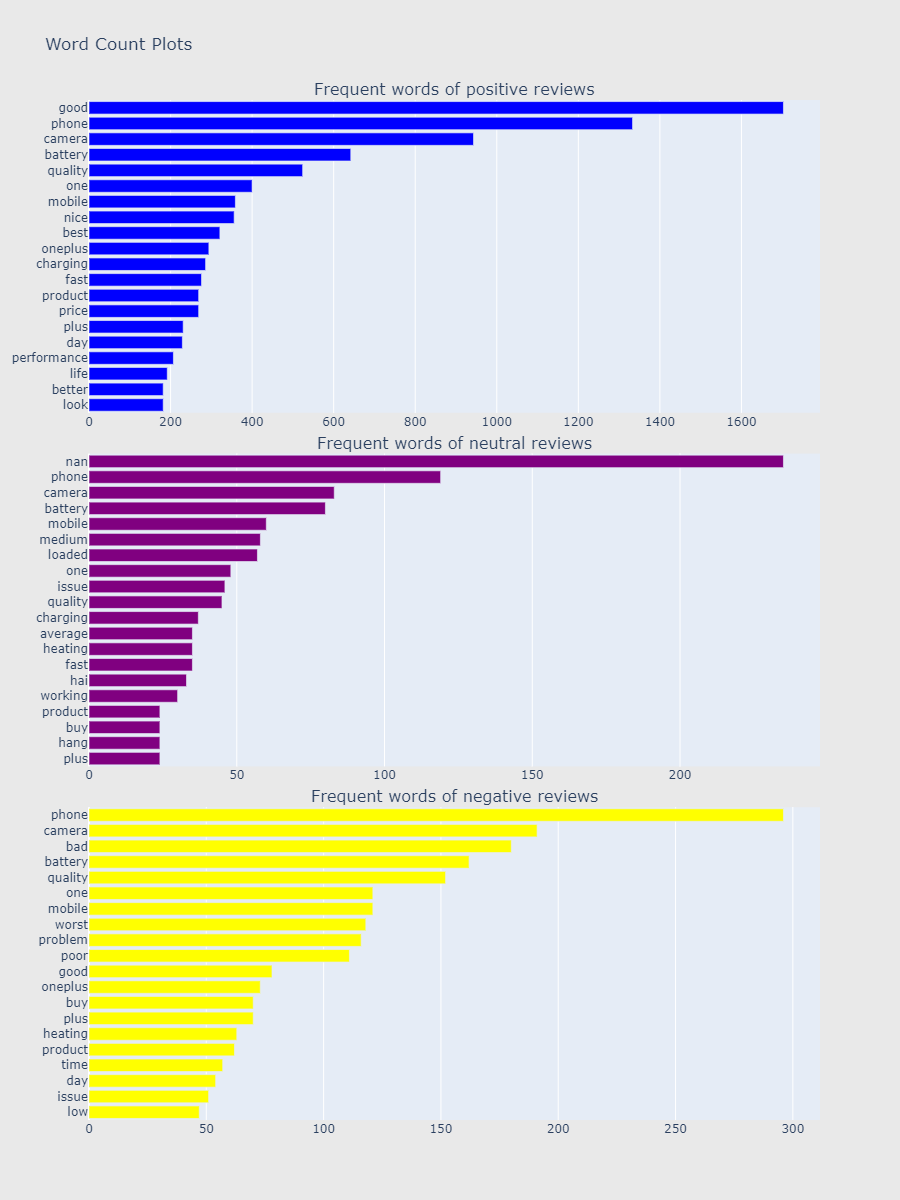

In [149]:
temp = df.groupby('sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='rainbow')

<AxesSubplot: xlabel='sentiment', ylabel='count'>

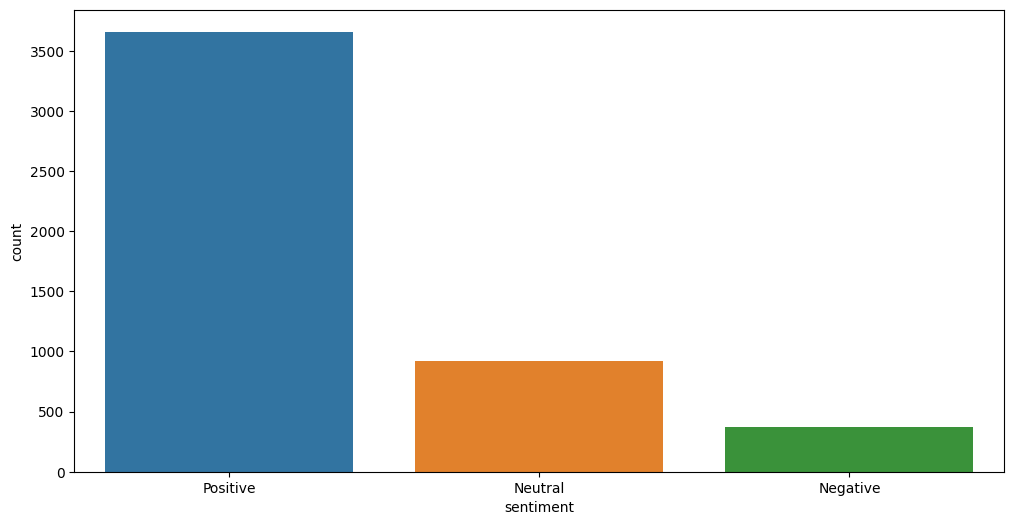

In [150]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot: xlabel='compound', ylabel='Density'>

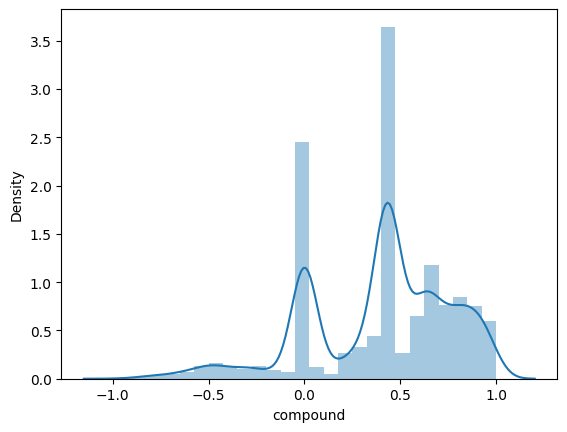

In [151]:
# Plotting the sentiment value for whole review
sns.distplot(df['compound'])

In [153]:
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

Review  word_count
0  midrange phone oneplus choose phone brand valu...          58
1  searching smartphone k segment checked lot pho...          60
2  bought big billion day sale towards end experi...          71
3  battery life decent heavy user get backup hr c...          54
4  six month use would like say good phone price ...          54

C:\Users\DELL\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='compound'>

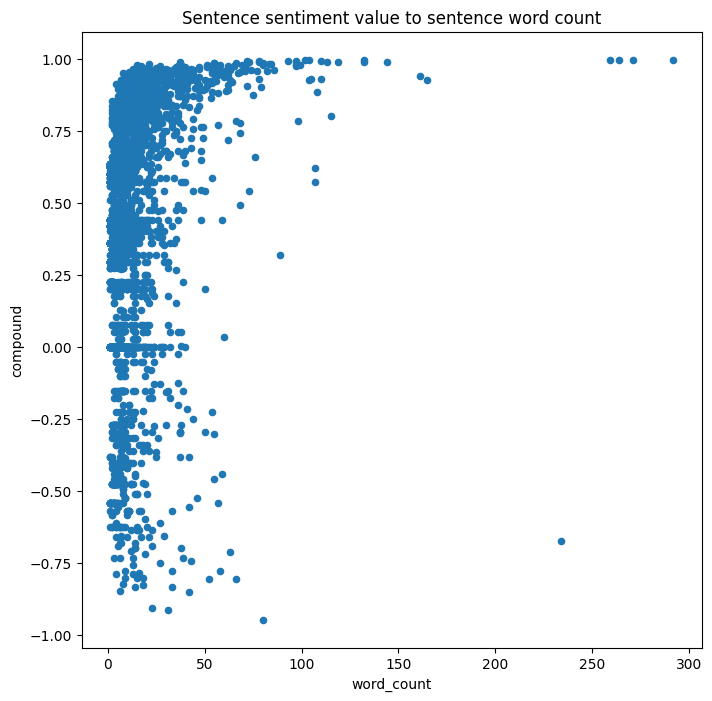

In [154]:
# Correlation analysis
df.plot.scatter(x='word_count',y='compound',figsize=(8,8),title='Sentence sentiment value to sentence word count')

### b. Using TextBlob

In [155]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

Clean_Reviews
pos           4628
neg            318

In [156]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  
0  A Midrange phone from oneplus. why I choose th...      0.755556  0.386111  
1  I was searching a smartphone in 25-30k segment...      0.661111  0.400000  
2  Bought in big billion day sale but towards the...      0.520513  0.202564  
3  *Battery life is decent, if you're a heavy use...      0.522083  0.292500  
4  After the six months of use i would like to sa...      0.565278  0.328472

Text(0, 0.5, 'Subjectivity')

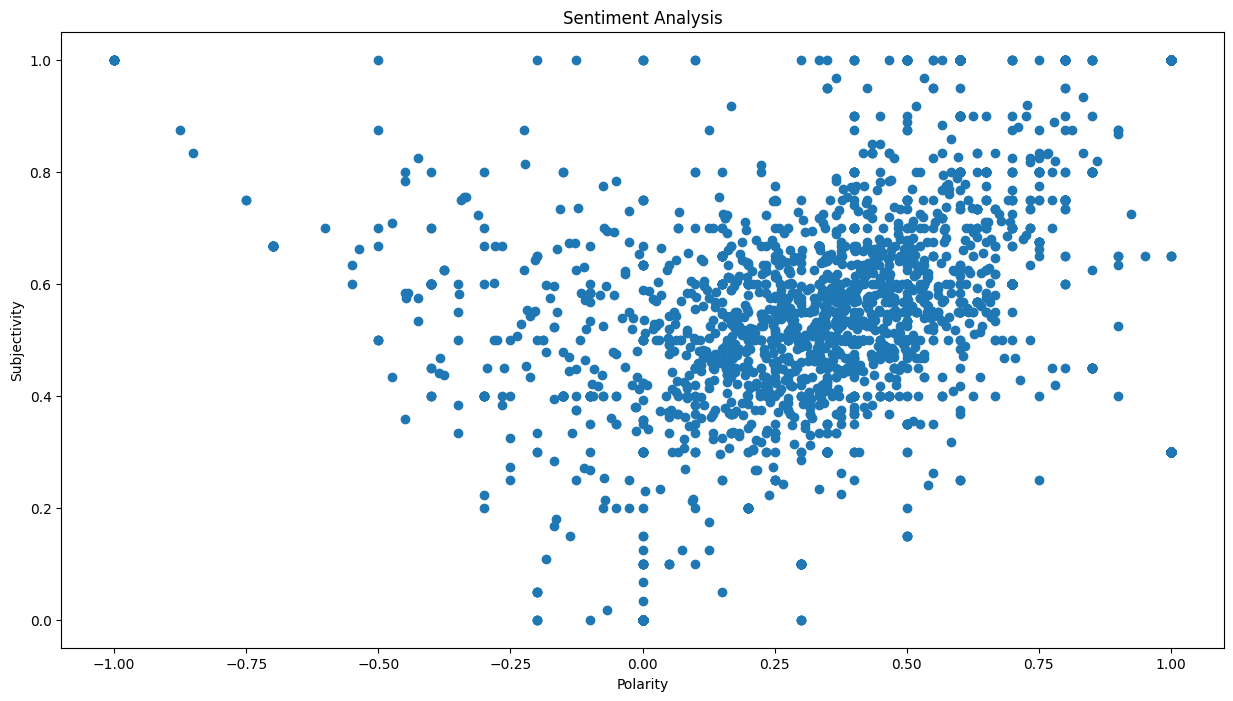

In [157]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [158]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

##### *NLTK* gives us more negative sentiments than TexBlob, so we will prefer NLTK, since classfication seems better.

In [160]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

Clean_Reviews  \
0  midrange phone oneplus choose phone brand valu...   
1  searching smartphone k segment checked lot pho...   
2  bought big billion day sale towards end experi...   
3  battery life decent heavy user get backup hr c...   
4  six month use would like say good phone price ...   

                                   Uncleaned_Reviews  Subjectivity  Polarity  \
0  A Midrange phone from oneplus. why I choose th...      0.755556  0.386111   
1  I was searching a smartphone in 25-30k segment...      0.661111  0.400000   
2  Bought in big billion day sale but towards the...      0.520513  0.202564   
3  *Battery life is decent, if you're a heavy use...      0.522083  0.292500   
4  After the six months of use i would like to sa...      0.565278  0.328472   

  sentiment  
0       pos  
1       pos  
2       pos  
3       pos  
4       pos

## Story Generation and Visualization

(-0.5, 1799.5, 1399.5, -0.5)

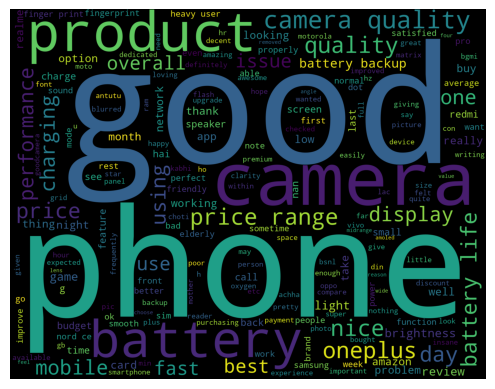

In [165]:
allWords_ = ' '.join([review for review in dataframe[:100]['Clean_Reviews']])
f, axes = plt.subplots()
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)
plt.axis('off')

### A. Most common words in positive Review
Answer can be best found using WordCloud

In [166]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

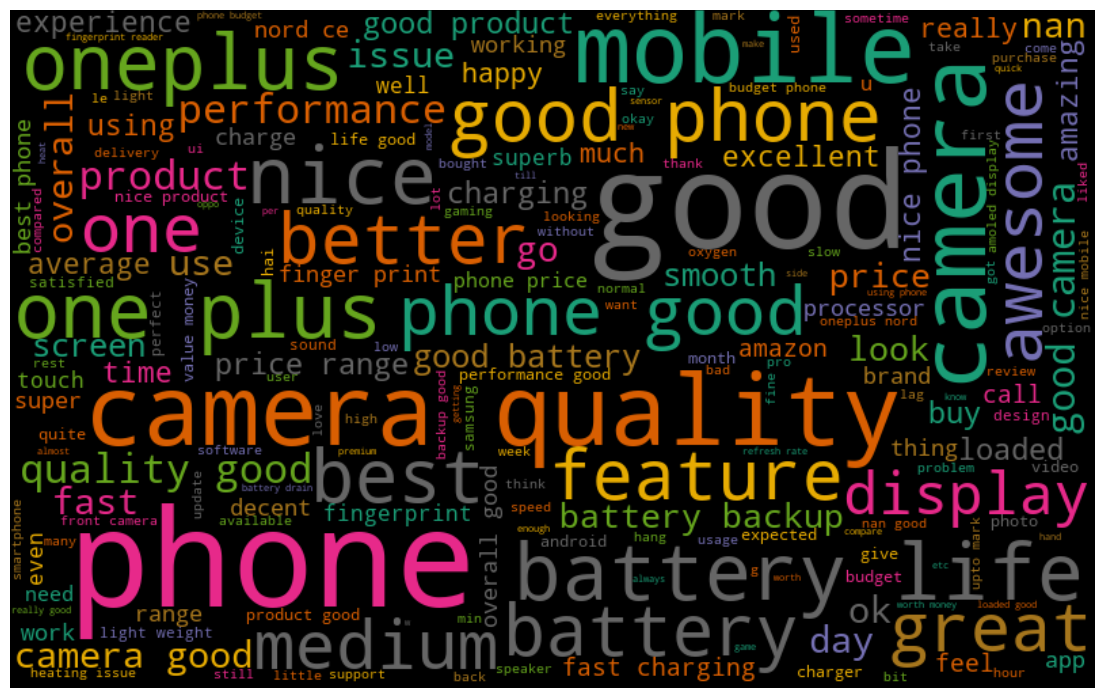

In [167]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### B. Most common words in negative Review

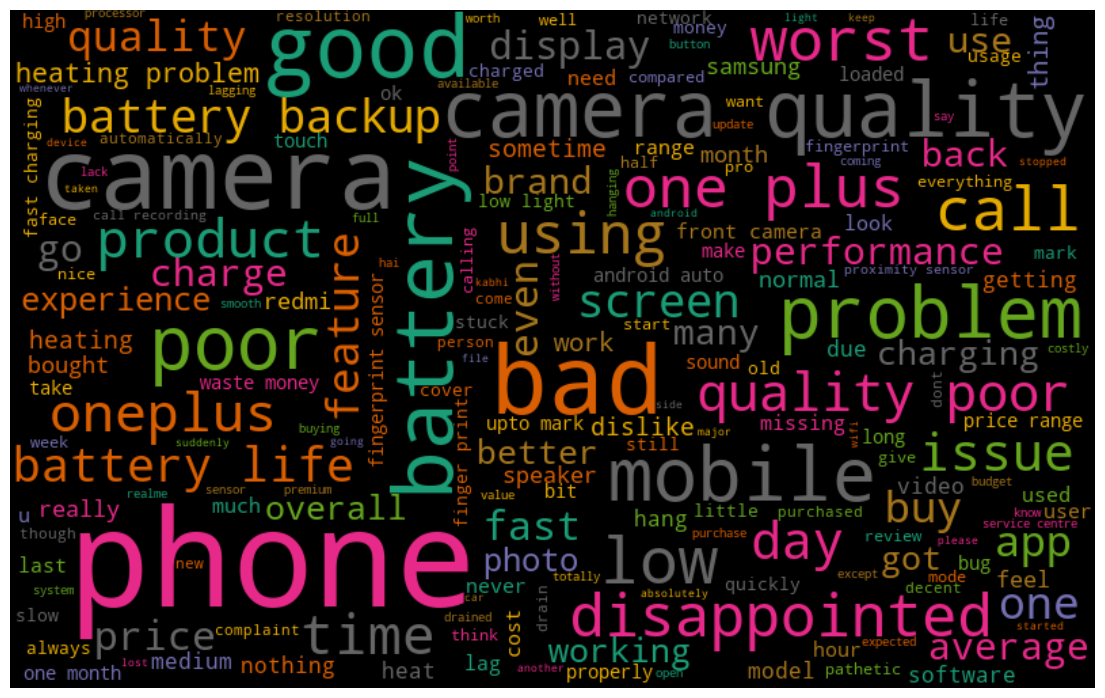

In [168]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)